In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [33]:
# Load the data

df = pd.read_csv(r"C:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MSFT(2000-2023).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,58.687500,59.312500,56.000000,58.281250,36.132248,53228400
1,1/4/2000,56.781250,58.562500,56.125000,56.312500,34.911709,54119000
2,1/5/2000,55.562500,58.187500,54.687500,56.906250,35.279816,64059600
3,1/6/2000,56.093750,56.937500,54.187500,55.000000,34.098019,54976600
4,1/7/2000,54.312500,56.125000,53.656250,55.718750,34.543629,62013600
...,...,...,...,...,...,...,...
6007,11/16/2023,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
6008,11/17/2023,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
6009,11/20/2023,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
6010,11/21/2023,375.670013,376.220001,371.119995,373.070007,373.070007,28423100


In [34]:
# Check data types
print(df.dtypes)
print("\n")

# Check for null values
null_values = df.isnull().sum()
print("Null values in each column: \n")
print(null_values)
print("\n")

# Drop rows with null values if any
if null_values.any():
    df = df.dropna()
    print("Dropped rows with null values.")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)
print("\n")

df.shape

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


Null values in each column: 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Number of duplicate rows:  0




(6012, 7)

In [35]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6.012000e+03
mean,77.767658,78.582541,76.941528,77.786900,70.789050,5.132949e+07
std,87.008302,87.897979,86.087633,87.036507,88.438452,3.074841e+07
min,15.200000,15.620000,14.870000,15.150000,11.304623,7.425600e+06
25%,27.030001,27.299999,26.807499,27.049999,19.027981,2.865732e+07
50%,32.550001,32.997500,32.187500,32.635000,23.633584,4.605860e+07
75%,84.222498,84.727497,83.497500,84.192499,78.474423,6.504930e+07
max,378.000000,379.790009,374.970001,377.850006,377.850006,5.910522e+08


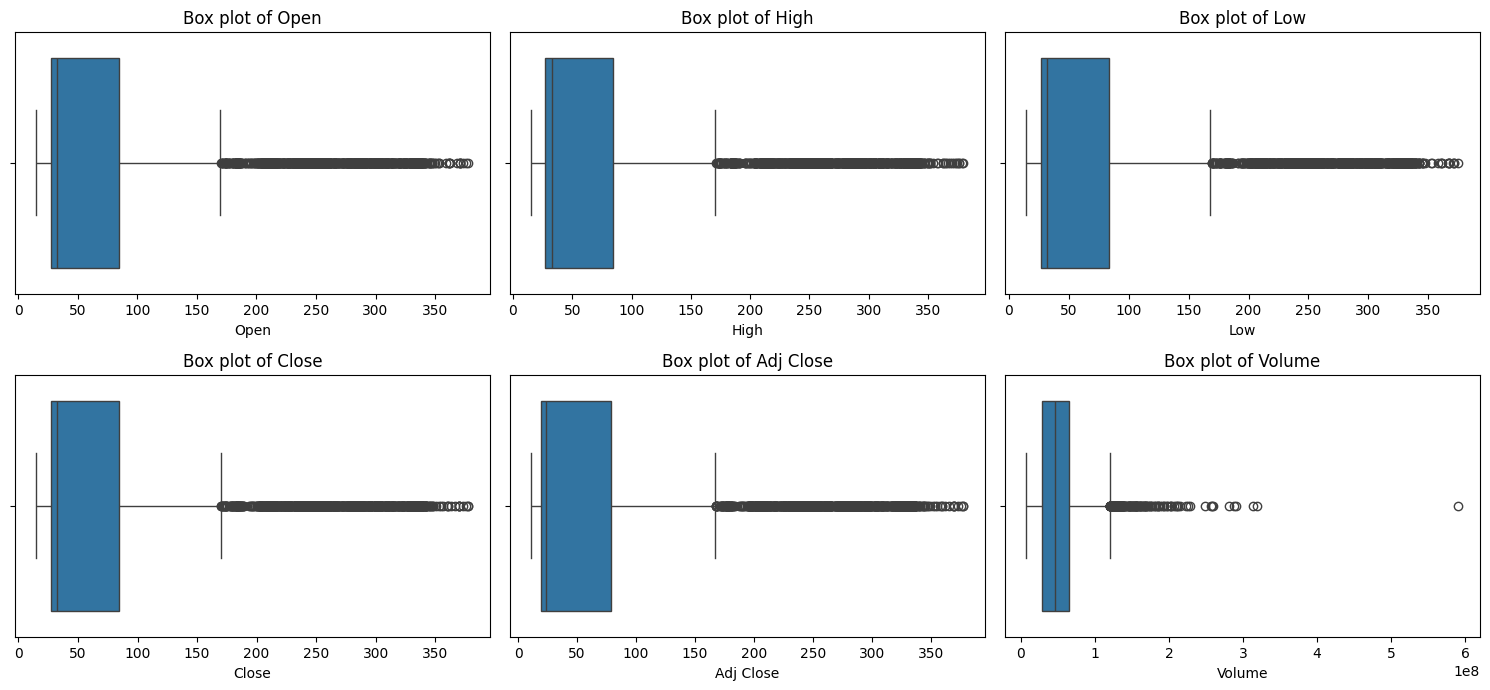

In [36]:
# Plot box plots for numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3x3 grid
    sb.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

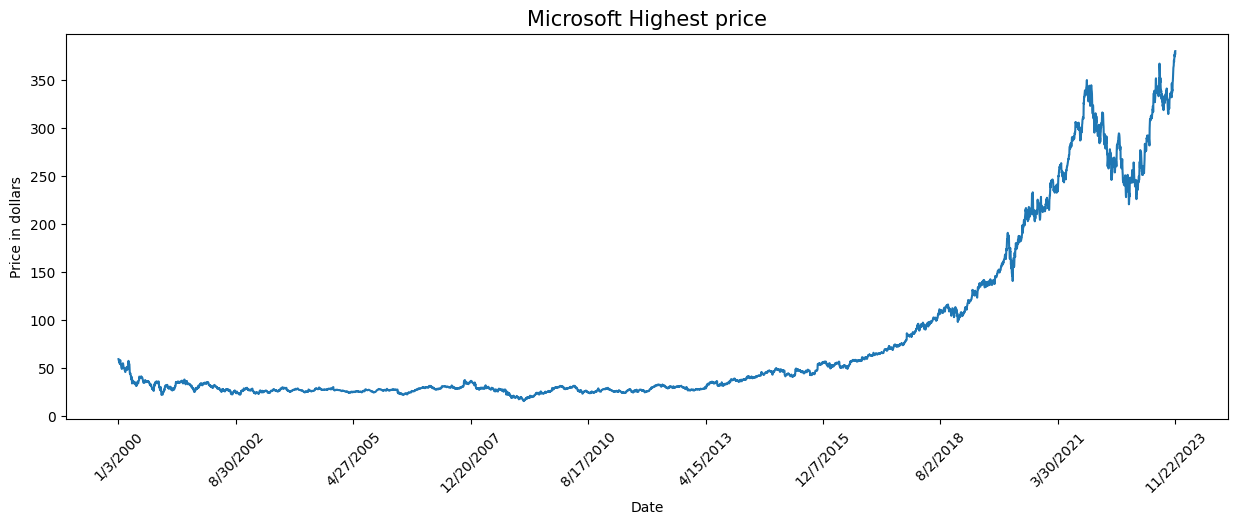

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['High'])
plt.title('Microsoft Highest price', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price in dollars')

# Show only a few dates on the x-axis
num_ticks = 10  # Number of ticks you want to show
tick_positions = np.linspace(0, len(df['Date']) - 1, num_ticks, dtype=int)
tick_labels = df['Date'].iloc[tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [38]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.132248,53228400,2000,1,3
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.911709,54119000,2000,1,4
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.279816,64059600,2000,1,5
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.098019,54976600,2000,1,6
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.543629,62013600,2000,1,7


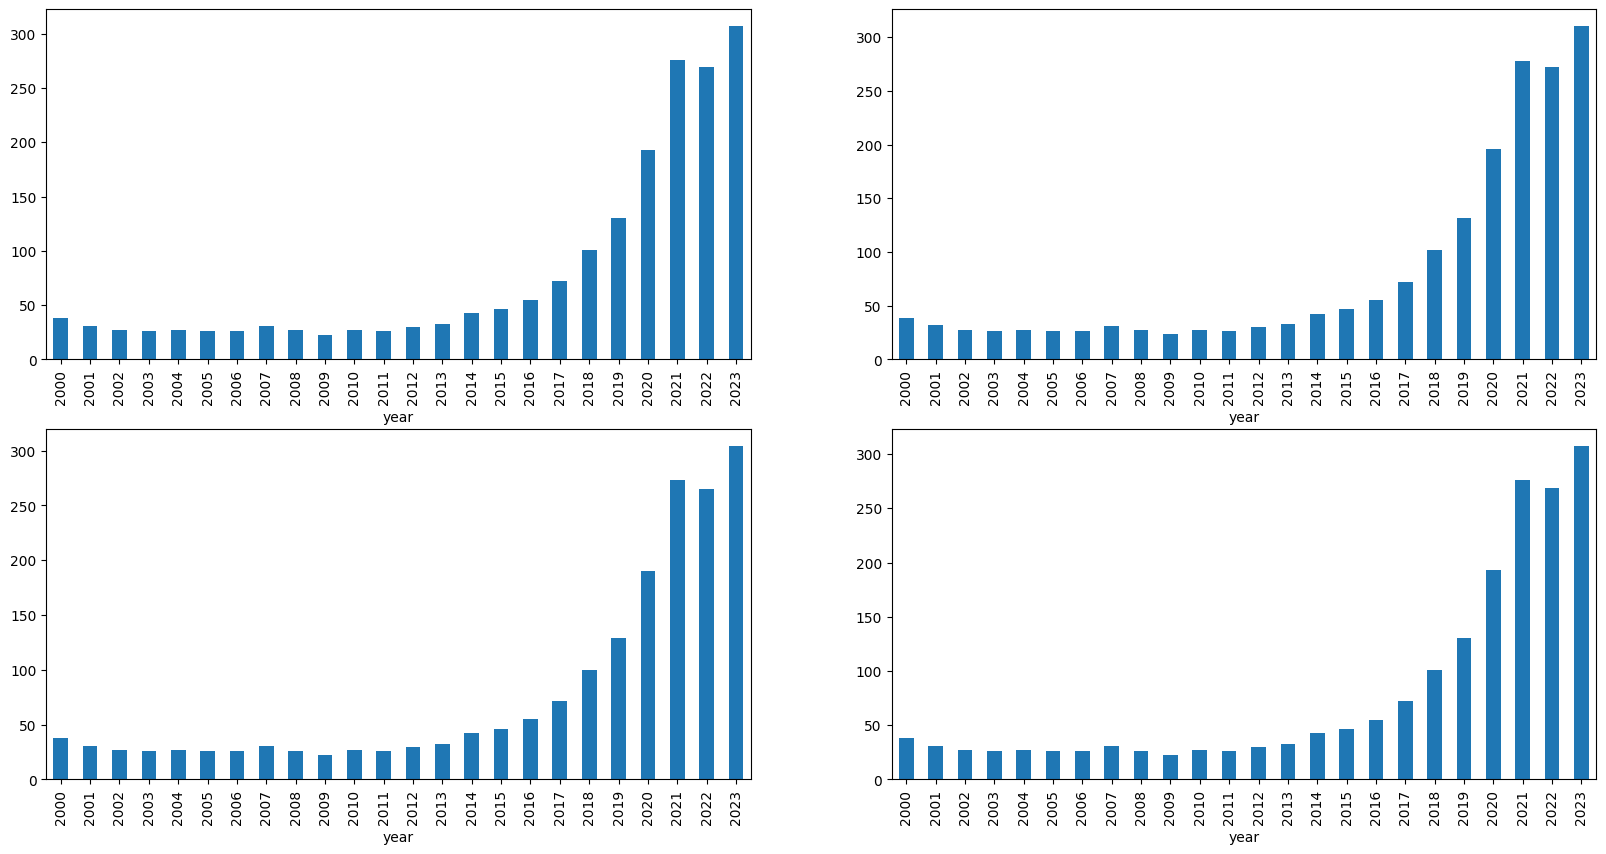

In [39]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.figure(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

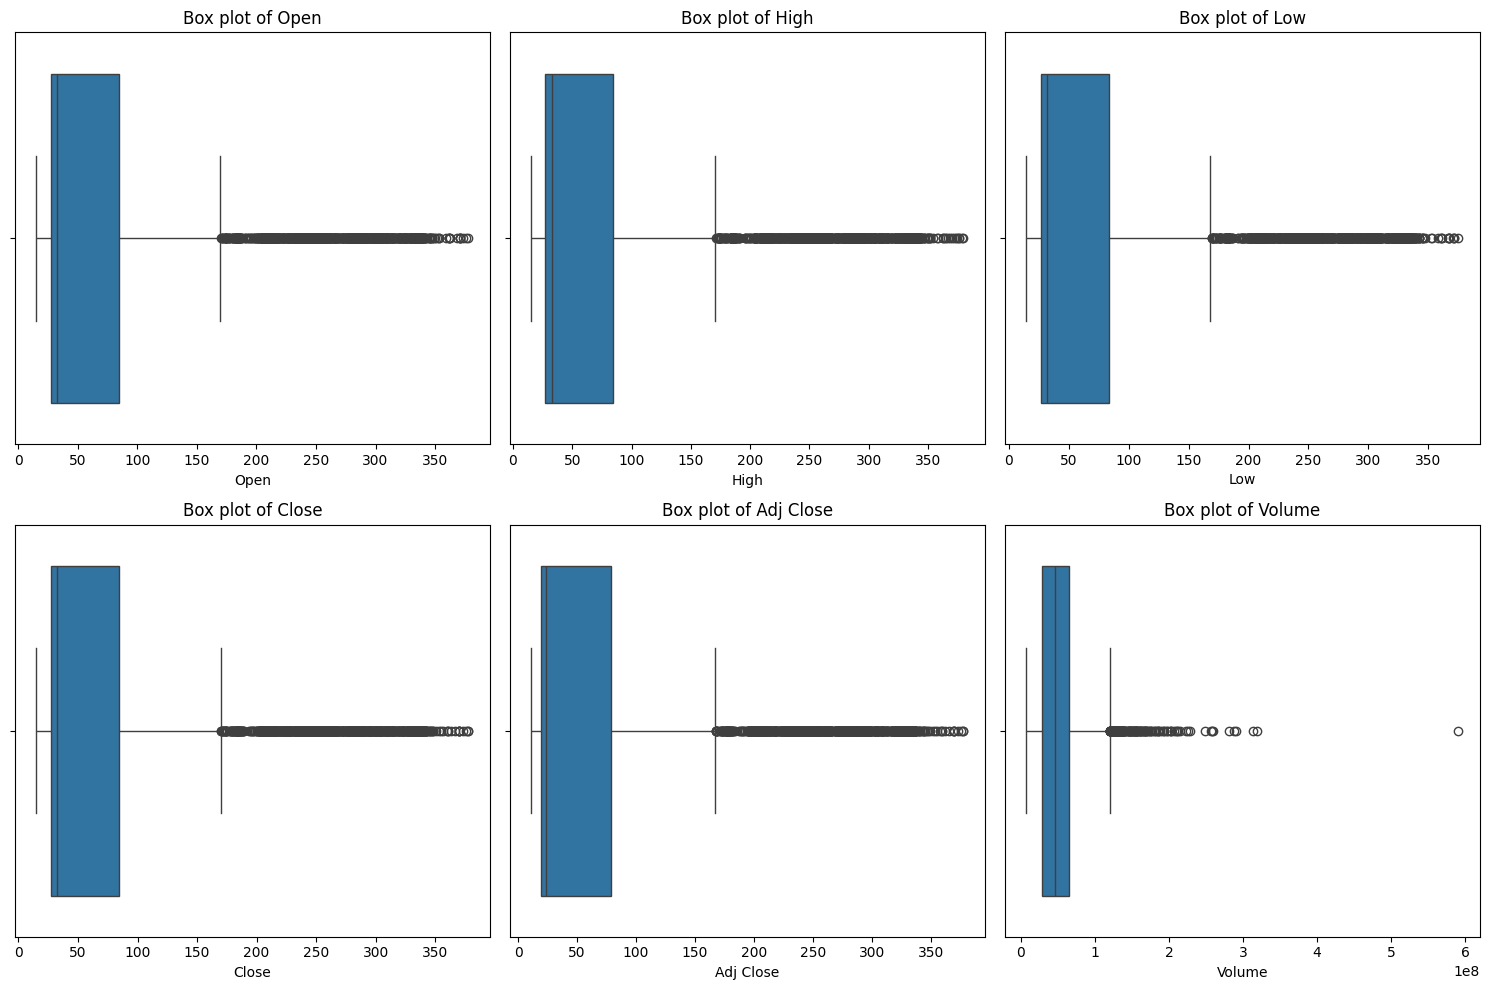

In [40]:
# Plot box plots for numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sb.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [41]:
# Example: Detect outliers using Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df[['High', 'Low', 'Close', 'Volume','Open']]))
outliers = (z_scores > 3).sum()
print("Outliers detected:\n", outliers)

Outliers detected:
 High      40
Low       47
Close     42
Volume    83
Open      42
dtype: int64


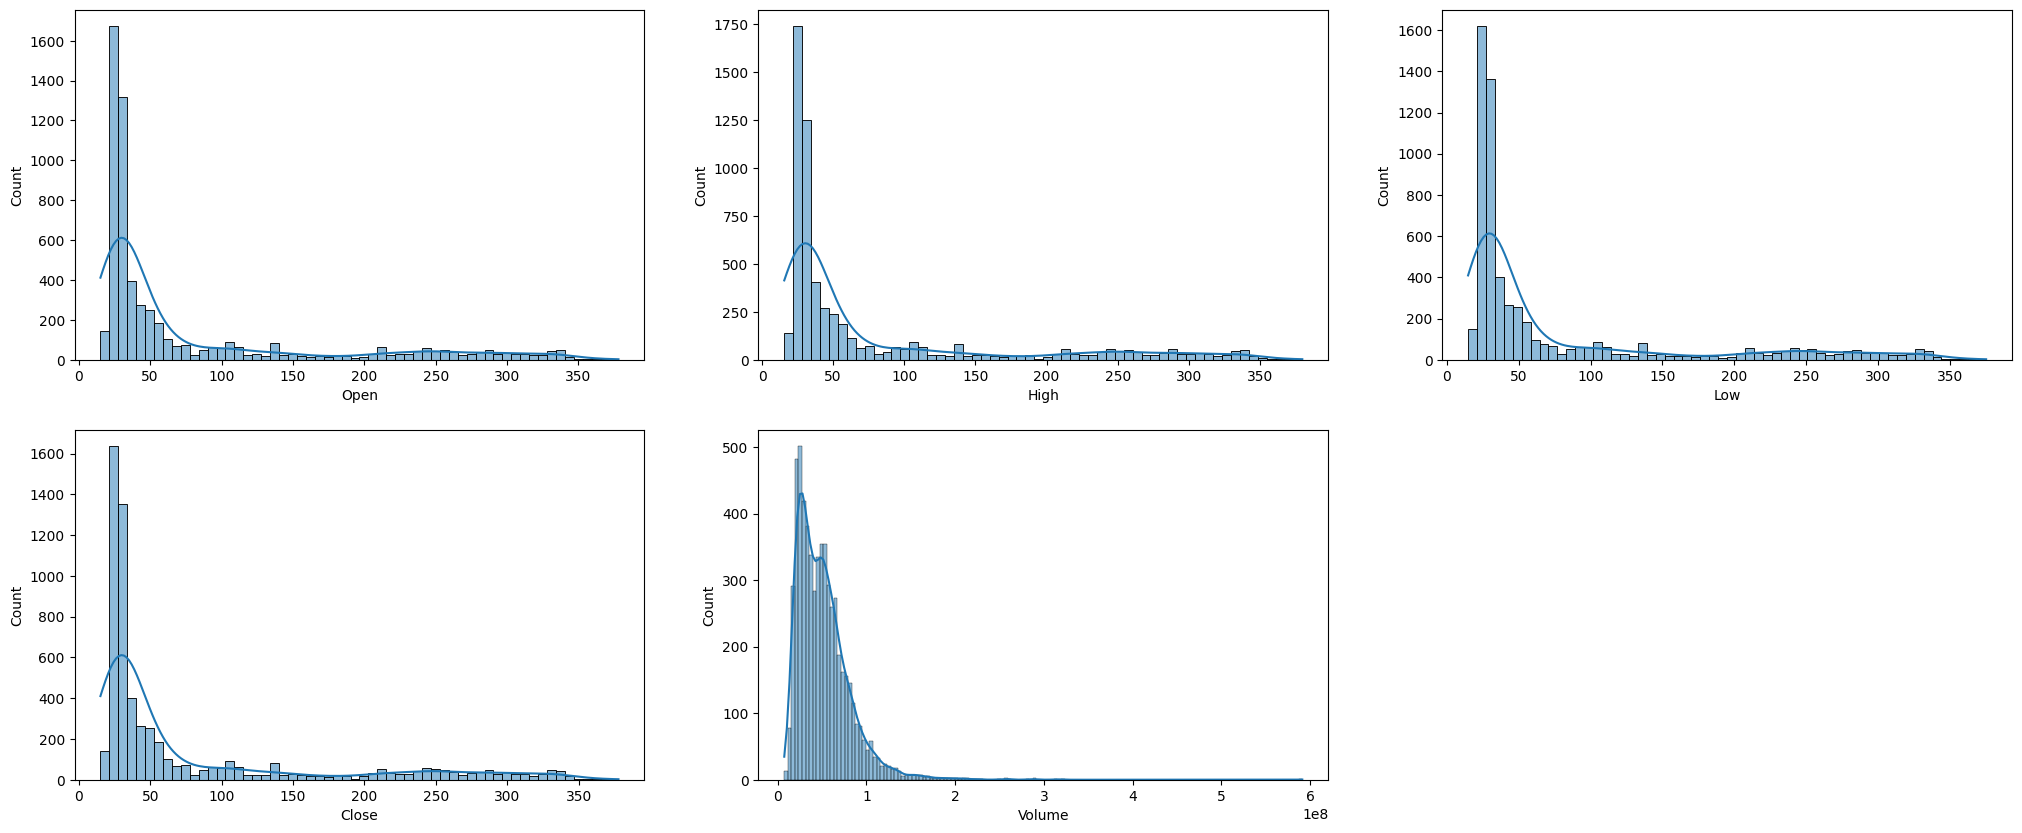

In [42]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(25, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True, stat='count')
plt.show()

In [43]:
# Create a new column for the target variable 

def compute_bollinger_bands(series, window):
	rolling_mean = series.rolling(window=window).mean()
	rolling_std = series.rolling(window=window).std()
	upper_band = rolling_mean + (rolling_std * 2)
	lower_band = rolling_mean - (rolling_std * 2)
	return upper_band, lower_band

df['MA5'] = df['High'].rolling(window=5).mean()
df['MA10'] = df['High'].rolling(window=10).mean()
df['MA20'] = df['High'].rolling(window=20).mean()

# Exponential Moving Average for 20 days for High price to smooth the data
df['EMA'] = df['High'].ewm(span=20, adjust=False).mean()

# Bollinger Bands to identify overbought and oversold conditions
df['BB_upper'], df['BB_lower'] = compute_bollinger_bands(df['High'], window=20)

data = df[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']]
data.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,MA20,EMA,BB_upper,BB_lower
0,2000-01-03,58.687500,59.31250,56.000000,58.28125,36.132248,53228400,NaN,NaN,NaN,59.312500,NaN,NaN
1,2000-01-04,56.781250,58.56250,56.125000,56.31250,34.911709,54119000,NaN,NaN,NaN,59.241071,NaN,NaN
2,2000-01-05,55.562500,58.18750,54.687500,56.90625,35.279816,64059600,NaN,NaN,NaN,59.140731,NaN,NaN
3,2000-01-06,56.093750,56.93750,54.187500,55.00000,34.098019,54976600,NaN,NaN,NaN,58.930900,NaN,NaN
4,2000-01-07,54.312500,56.12500,53.656250,55.71875,34.543629,62013600,57.82500,NaN,NaN,58.663671,NaN,NaN
5,2000-01-10,56.718750,56.84375,55.687500,56.12500,34.795475,44963600,57.33125,NaN,NaN,58.490345,NaN,NaN
6,2000-01-11,55.750000,57.12500,54.343750,54.68750,33.904274,46743600,57.04375,NaN,NaN,58.360312,NaN,NaN
7,2000-01-12,54.250000,54.43750,52.218750,52.90625,32.799953,66532400,56.29375,NaN,NaN,57.986711,NaN,NaN
8,2000-01-13,52.187500,54.31250,50.750000,53.90625,33.419914,83144000,55.76875,NaN,NaN,57.636786,NaN,NaN
9,2000-01-14,53.593750,56.96875,52.875000,56.12500,34.795475,73416400,55.93750,56.881250,NaN,57.573164,NaN,NaN


In [48]:
import plotly.graph_objects as go

# Ensure 'Date' column is in the data DataFrame
data = df.copy()

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot High Price and Moving Averages
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Microsoft Stock Price', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Moving Averages for the year 2021
data_2021 = data.loc['2023']

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Moving Averages for 2023', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Bollinger Bands
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_upper'], mode='lines', name='BB Upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_lower'], mode='lines', name='BB Lower'))
fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


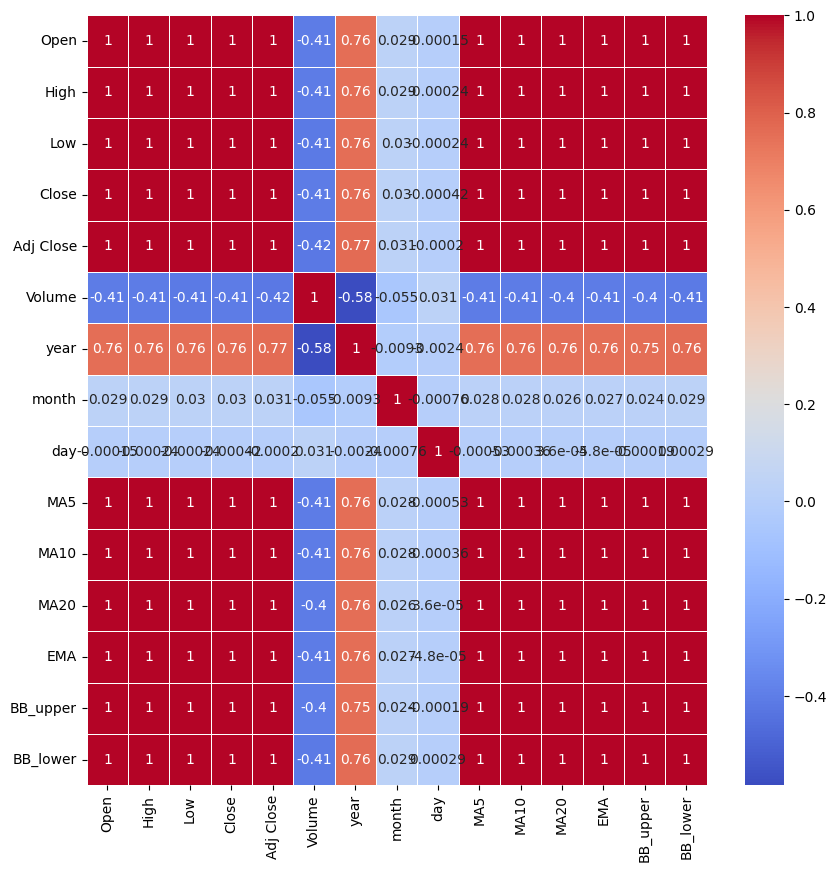

In [49]:
plt.figure(figsize=(10, 10))

# Exclude 'Date' column from correlation calculation
corr_matrix = df.drop(columns=['Date']).corr()

sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [50]:
micro = df.loc[2515:6012]
micro

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,MA5,MA10,MA20,EMA,BB_upper,BB_lower
2515,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474922,38409100,2010,1,4,31.212000,31.023000,30.546500,30.625838,31.640682,29.452318
2516,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482502,49749600,2010,1,5,31.196000,31.088000,30.583000,30.670997,31.700839,29.465161
2517,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338396,58182400,2010,1,6,31.112000,31.112000,30.633000,30.709949,31.745553,29.520447
2518,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095678,50559700,2010,1,7,30.994000,31.089000,30.681000,30.709002,31.711114,29.650886
2519,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400,2010,1,8,30.972000,31.082000,30.734500,30.725287,31.681973,29.787027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,2023-11-16,370.959991,376.350006,370.179993,376.170013,376.170013,27182300,2023,11,16,372.000006,366.305005,352.939505,356.669465,383.312844,322.566166
6008,2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000,2023,11,17,372.854004,368.303003,355.062004,358.355229,385.182500,324.941508
6009,2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100,2023,11,20,374.934003,370.436002,357.369003,360.309017,387.355204,327.382803
6010,2023-11-21,375.670013,376.220001,371.119995,373.070007,373.070007,28423100,2023,11,21,375.788000,371.812003,359.588004,361.824348,388.154523,331.021484


In [51]:
# Ensure that the dataset has at least 1000 rows after preprocessing
if len(micro) < 1000:
    raise ValueError("Dataset contains fewer than 1000 samples after preprocessing.")

# Save the preprocessed dataset
micro.to_csv('microsoft_cleaned_data.csv', index=False)
print("Preprocessing complete. Dataset saved.")
print(micro.head())

Preprocessing complete. Dataset saved.
            Date       Open       High        Low      Close  Adj Close  \
2515  2010-01-04  30.620001  31.100000  30.590000  30.950001  23.474922   
2516  2010-01-05  30.850000  31.100000  30.639999  30.959999  23.482502   
2517  2010-01-06  30.879999  31.080000  30.520000  30.770000  23.338396   
2518  2010-01-07  30.629999  30.700001  30.190001  30.450001  23.095678   
2519  2010-01-08  30.280001  30.879999  30.240000  30.660000  23.254963   

        Volume  year  month  day     MA5    MA10     MA20        EMA  \
2515  38409100  2010      1    4  31.212  31.023  30.5465  30.625838   
2516  49749600  2010      1    5  31.196  31.088  30.5830  30.670997   
2517  58182400  2010      1    6  31.112  31.112  30.6330  30.709949   
2518  50559700  2010      1    7  30.994  31.089  30.6810  30.709002   
2519  51197400  2010      1    8  30.972  31.082  30.7345  30.725287   

       BB_upper   BB_lower  
2515  31.640682  29.452318  
2516  31.700839  29